<div style="text-align: left; background-color:yellow; font-family: Trebuchet MS; color:black; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 98px;border-style: solid;border-color: black solid;"> Amazon Top Bestselling Books</div>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="background-color:yellow;font-family:sans-serif;color:black;font-size:150%;text-align:center;border-radius:9px 9px; padding: 15px; border-style: solid; border-color: black">TABLE OF CONTENTS</div>


* [1. IMPORTING LIBRARIES](#1)

* [2. LOADING DATASET](#2)

* [3. EXPLORATORY SOME INFORMATION ABOUT DATASET](#3)

* [4. PREPROCESSING DATASET](#4)

* [5. DATA VISUALIZATION](#5)

* [6. AUTHOR MESSAGE](#6)


<a id="1"></a>
## <b>1 <span style='color:yellow'>||</span> IMPORTING LIBRARIES</b>

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from matplotlib import colors


<a id="2"></a>
## <b>2 <span style='color:yellow'>||</span> LOADING DATASET</b>

In [56]:
df=pd.read_csv("../input/bestsellers_with_categories.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


<a id="3"></a>
## <b>3 <span style='color:yellow'>||</span>EXPLORATORY SOME INFORMATION ABOUT DATASET</b>

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [58]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [59]:
df.shape

(550, 7)

In [60]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [61]:
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [62]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [63]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

<a id="4"></a>
## <b>4 <span style='color:YELLOW'>||</span> PREPROCESSING DATASET</b>

In [64]:
df.rename(columns={"User Rating":"User_Rating"},inplace=True)

In [65]:
df.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [66]:
df.Name.value_counts()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Humans of New York : Stories                                                     1
Howard Stern Comes Again                                                         1
Homebody: A Guide to Creating Spaces You Never Want to Leave                     1
Have a Little Faith: A True Story                                                1
Night (Night)                                                                    1
Name: Name, Length: 351, dtype: int64

In [67]:
df.User_Rating.value_counts()

4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: User_Rating, dtype: int64

In [68]:
df.Reviews.value_counts()

8580     10
5069      9
21834     8
19546     7
19576     6
         ..
5272      1
3776      1
1930      1
13471     1
5680      1
Name: Reviews, Length: 346, dtype: int64

In [69]:
df.Price.value_counts()

8      52
6      38
9      38
5      36
11     35
4      32
14     30
13     29
10     28
12     27
7      23
15     21
16     20
17     19
20     17
18     14
0      12
46     10
21      9
22      6
28      6
24      5
23      5
2       5
40      5
30      5
19      4
27      4
32      2
25      2
105     2
52      1
54      1
3       1
39      1
53      1
1       1
36      1
82      1
42      1
Name: Price, dtype: int64

In [70]:
df.Year.value_counts()

2016    50
2011    50
2018    50
2017    50
2019    50
2014    50
2010    50
2009    50
2015    50
2013    50
2012    50
Name: Year, dtype: int64

In [71]:
df.Genre.value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

<a id="5"></a>
## <b>5 <span style='color:YELLOW'>||</span> DATA VISUALIZATION</b>

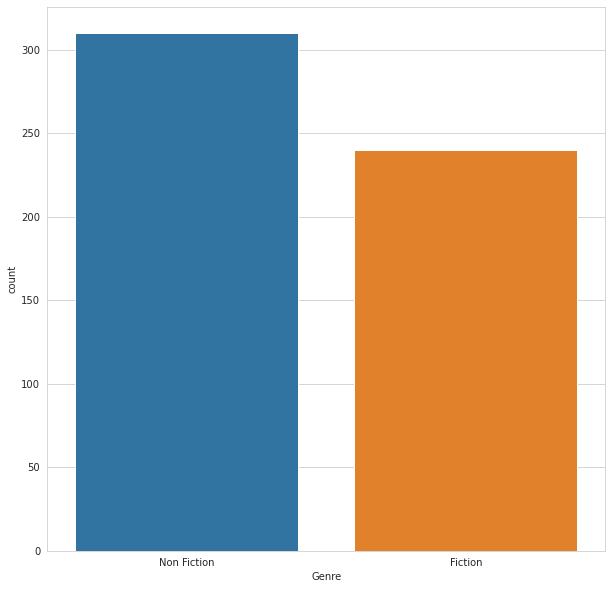

In [72]:
#df.Genre.hist()
sns.countplot(
    data=df, x =df['Genre']

)
plt.show()


In [73]:
us_series_data=df[df['Genre']=='Non Fiction']
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Author', 'User_Rating'],fill_color='Magenta'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['User_Rating']],fill_color='thistle'))
                     ])
fig.show()


In [74]:
us_series_data=df[df['Genre']=='Fiction']
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Author', 'User_Rating'],fill_color='light gray'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['User_Rating']],fill_color='light blue'))
                     ])
fig.show()


In [75]:
dfd1 = df[df['Author']== 'Jeff Kinney']
dfd2 = df[df['Author']== 'Gary Chapman']
dfd3 = df[df['Author']== 'Rick Riordan']
dfd4 = df[df['Author']== 'Suzanne Collins']

redf1 = dfd1["Genre"].value_counts()[:10].reset_index()
redf2 = dfd2['Genre'].value_counts()[:10].reset_index()
redf3 = dfd3['Genre'].value_counts()[:10].reset_index()
redf4 = dfd4['Genre'].value_counts()[:10].reset_index()


fig = go.Figure()

fig.add_trace(go.Bar(x = redf1["index"],
                     y = redf1["Genre"],
                     marker = dict(color = 'yellow'),
                     name = 'Jeff Kinneyt'))

fig.add_trace(go.Bar(x = redf2['index'],
                     y = redf2['Genre'],
                     name = 'Gary Chapman',
                     marker = dict(color = 'blue')))

fig.add_trace(go.Bar(x = redf3['index'],
                     y = redf3['Genre'],
                     name = 'Rick Riordan',
                     marker = dict(color = 'green')))

fig.add_trace(go.Bar(x = redf4['index'],
                     y = redf4['Genre'],
                     name = 'Suzanne Collins',
                     marker = dict(color = 'magenta')))

fig.update_layout(
    updatemenus=[
        dict(
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.13,
            xanchor="left",
            y=1.12,
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[ {"visible": [True, True, True,True]},
                            {'showlegend' : True}
                        ]),
                dict(label="Jeff Kinney",
                     method="update",
                     args=[ {"visible": [True, False, False,False]},
                            {'showlegend' : True}
                        ]),
                dict(label='Gary Chapman',
                     method="update",
                     args=[ {"visible": [False, True, False,False]},
                            {'showlegend' : True}
                     ]),
                dict(label='Rick Riordan',
                     method="update",
                     args=[ {"visible": [False, False, True,False]},
                            {'showlegend' : True}
                        ]),
                dict(label='Suzanne Collins',
                     method="update",
                     args=[ {"visible": [False, False,False,True]},
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=2, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'Cyan'))])

fig.update_layout(title ="Author and Genre",
                  title_x = 0.5,
                  title_font = dict(size = 30, color = 'Cyan'))

fig.show()

In [76]:
dfp = df['User_Rating'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['Price'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = df['Year'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['User_Rating'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'User_Rating',
                     marker = dict(color = 'purple')))

fig.add_trace(go.Bar(x = dfl['Price'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Price',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['Year'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Year',
                     marker = dict(color = 'pink')))

fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction="left",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.16,
            xanchor="left",
            y=1.12,
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([

                dict(label="User_Rating",
                     method="update",
                     args=[ {"visible": [True, False, False]},
                            {'showlegend' : True}
                        ]),
                dict(label='Price',
                     method="update",
                     args=[ {"visible": [False, True, False]},
                            {'showlegend' : True}
                     ]),
                dict(label='Year',
                     method="update",
                     args=[ {"visible": [False, False, True]},
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="EDA_Amazon_Top_Bestselling_Books(User_Rating,Price,Reviews)",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()

# Which author has the most books?

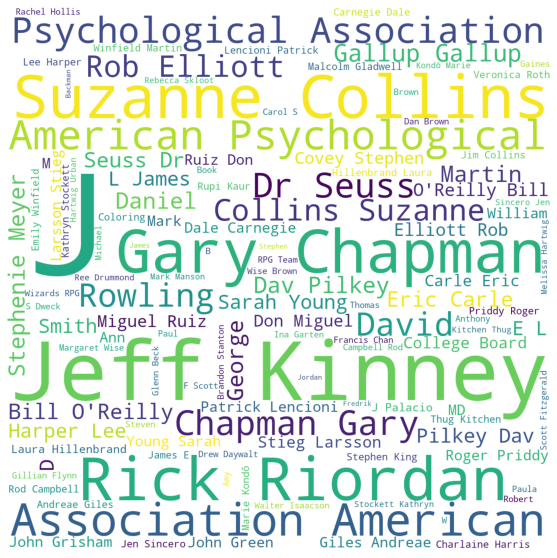

In [77]:
#color_list=  ['DarkBlue','Teal','LightBlue','black','pink','Orange','red','blue','purple']

#colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (10,10)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 1200 ,
                       max_words = 120).generate(" ".join(df['Author']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

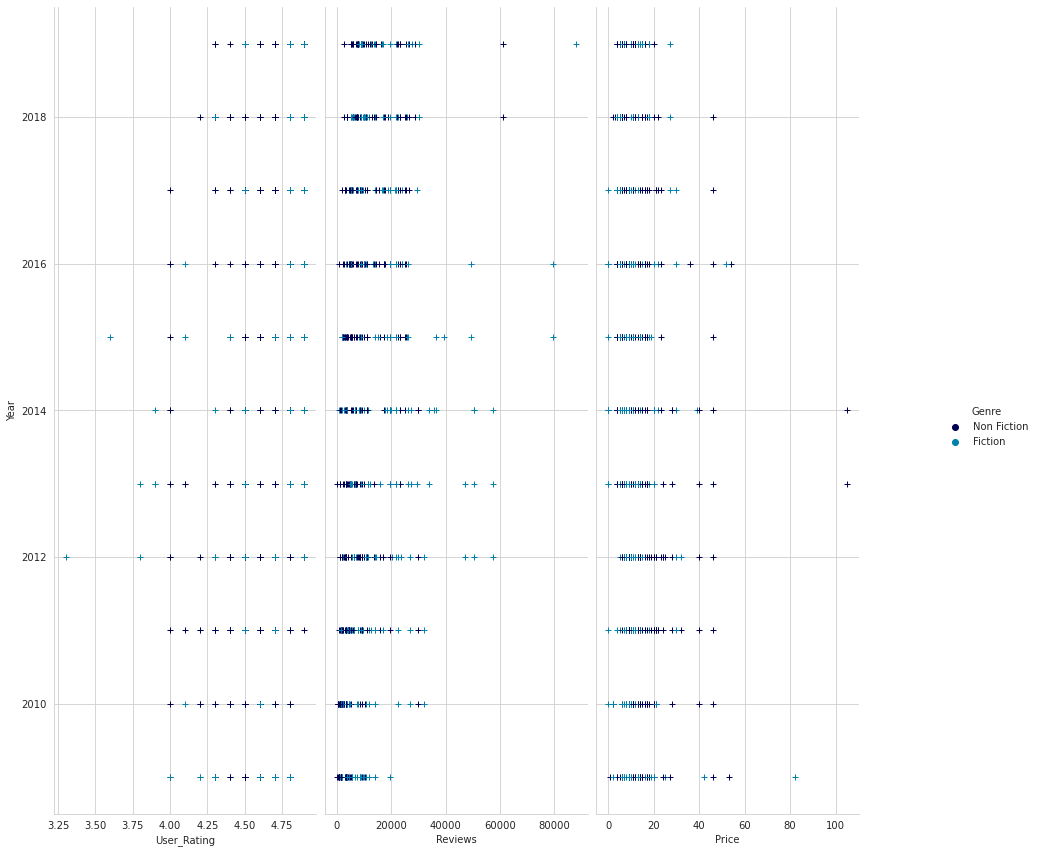

In [78]:
g=sns.pairplot(
    df,
    x_vars=["User_Rating", "Reviews", "Price"],
    y_vars=["Year"],    plot_kws=dict(marker="+", linewidth=1),
    palette="ocean", hue="Genre"
)
g.fig.set_size_inches(15,15)
plt.show()

<a id="3.1"></a>
#### <b>3.1 <span style='color:cyan'>|</span> Which authors have the most books between 2009-2019?

In [79]:
df.Author.value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

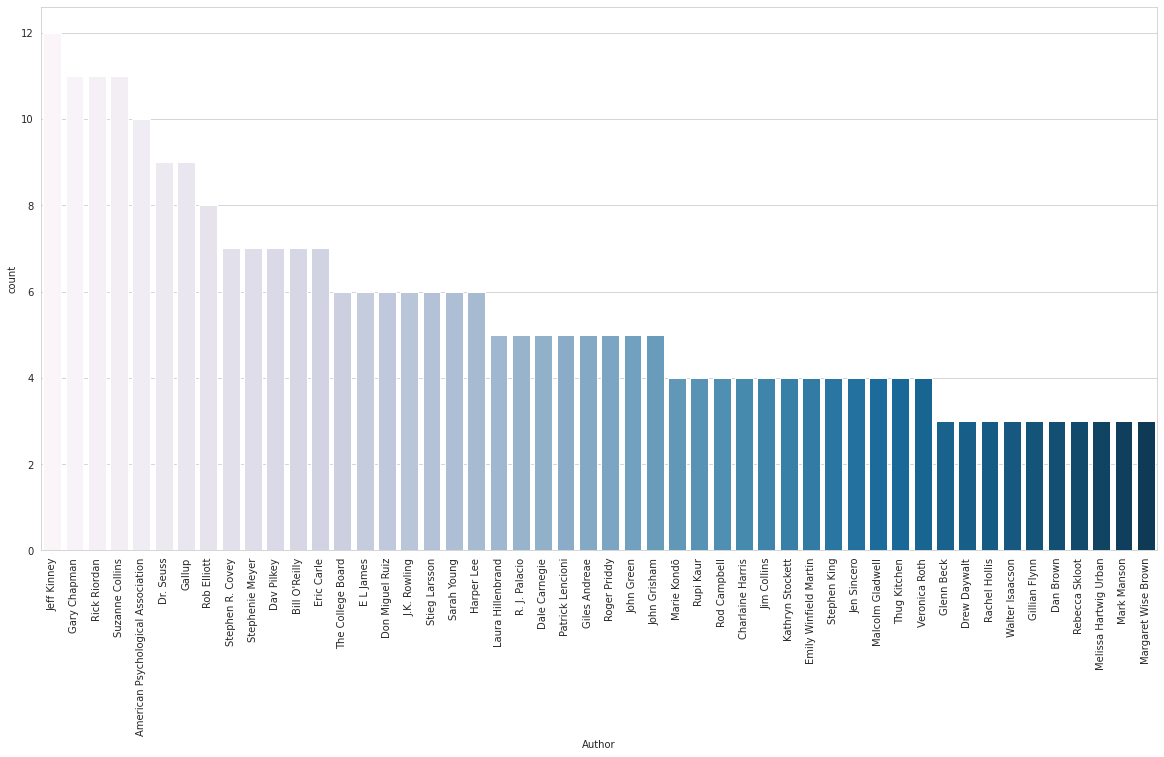

In [80]:
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
sns.countplot(data = df , x =df['Author'] ,palette='PuBu',order=df['Author'].value_counts().index[0:50])
plt.show()

<a id="3.2"></a>
#### <b>3.2 <span style='color:cyan'>|</span> Which are the top rated books?

In [81]:
p=df.Name[df.User_Rating==4.9]
p

40              Brown Bear, Brown Bear, What Do You See?
41              Brown Bear, Brown Bear, What Do You See?
81     Dog Man and Cat Kid: From the Creator of Capta...
82     Dog Man: A Tale of Two Kitties: From the Creat...
83     Dog Man: Brawl of the Wild: From the Creator o...
84     Dog Man: Brawl of the Wild: From the Creator o...
85     Dog Man: Fetch-22: From the Creator of Captain...
86     Dog Man: For Whom the Ball Rolls: From the Cre...
87     Dog Man: Lord of the Fleas: From the Creator o...
146    Goodnight, Goodnight Construction Site (Hardco...
147    Goodnight, Goodnight Construction Site (Hardco...
151                             Hamilton: The Revolution
153    Harry Potter and the Chamber of Secrets: The I...
155    Harry Potter and the Goblet of Fire: The Illus...
156    Harry Potter and the Prisoner of Azkaban: The ...
157    Harry Potter and the Sorcerer's Stone: The Ill...
174                         Humans of New York : Stories
187    Jesus Calling: Enjoying 

In [82]:
a=df.sort_values(by="User_Rating",ascending=False) #viewCount goes from highest to lowest.
a

,Name,Author,User_Rating,Reviews,Price,Year,Genre
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
...,...,...,...,...,...,...,...
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


In [83]:
a.Name.value_counts()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
The Very Hungry Caterpillar                                                      7
                                                                                ..
What Pet Should I Get? (Classic Seuss)                                           1
What If?: Serious Scientific Answers to Absurd Hypothetical Questions            1
Uninvited: Living Loved When You Feel Less Than, Left Out, and Lonely            1
Twilight (The Twilight Saga, Book 1)                                             1
The Casual Vacancy                                                               1
Name: Name, Length: 351, dtype: int64

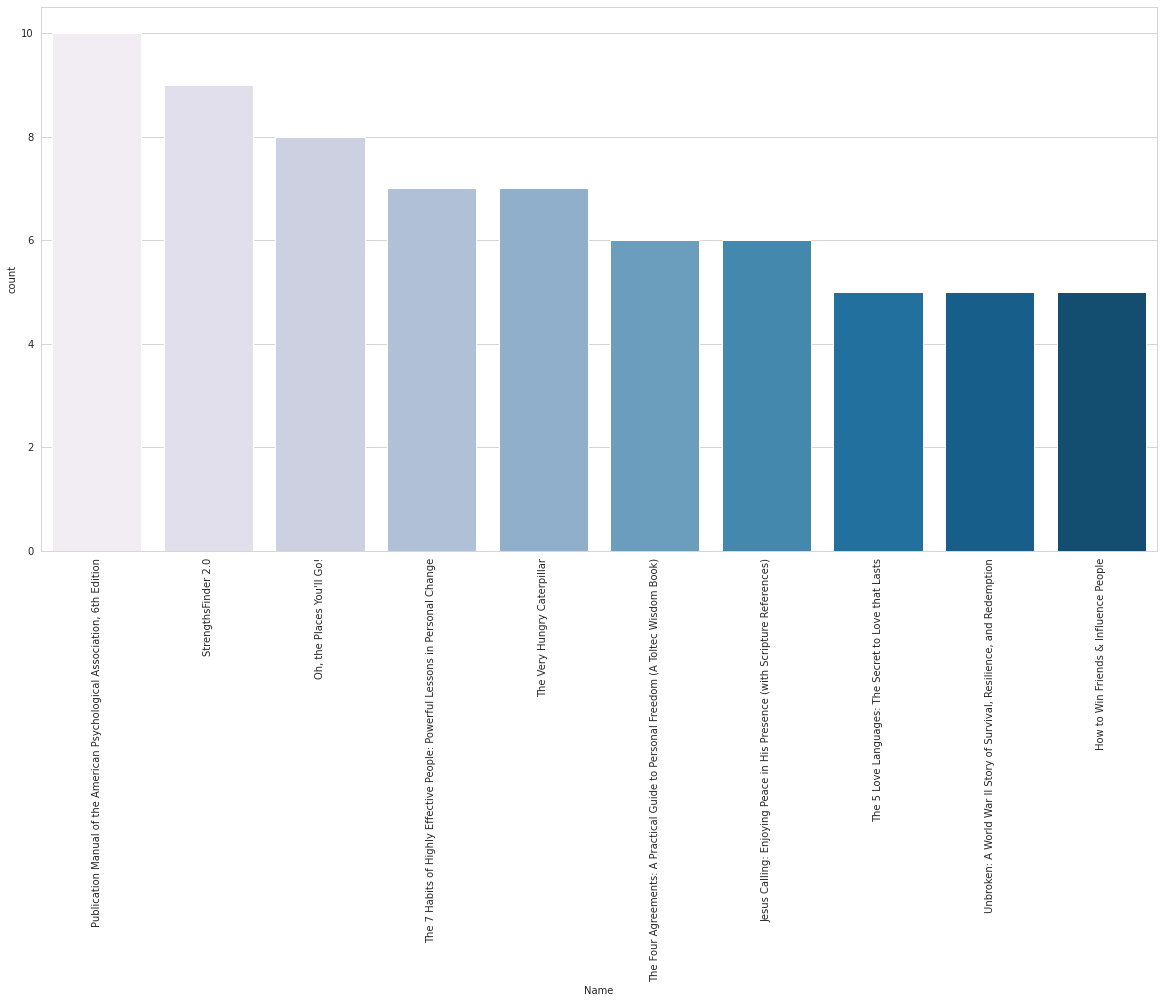

In [84]:
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
sns.countplot(data = a , x =a['Name'] ,palette='PuBu',order=a['Name'].value_counts().index[0:10])
plt.show()

# In this countplot, the name and number of the first 10 books in the rating order are given.

In [85]:
oldest_us_series=df.sort_values(by='User_Rating',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Name', 'User_Rating'],fill_color='cyan'),
                 cells=dict(values=[oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='light blue'))
                     ])
fig.show()


<AxesSubplot:>

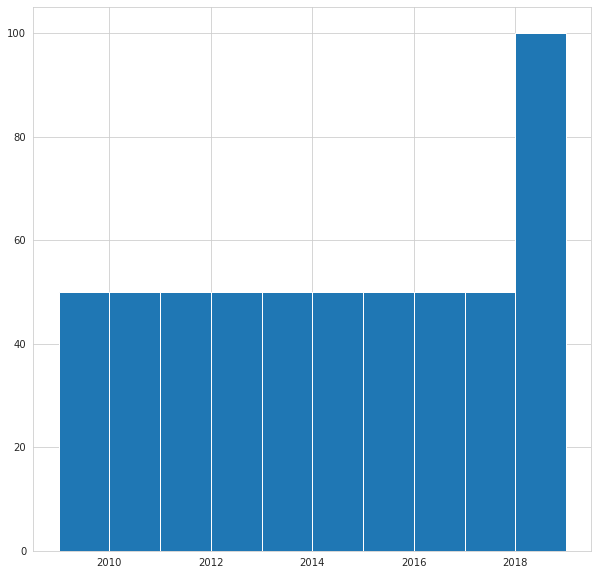

In [86]:
df.Year.hist()

In [87]:
df.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# What are the most visited books?

In [88]:
oldest_us_series=df.sort_values(by='Reviews',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Name', 'Reviews'],fill_color='lightsalmon'),
                 cells=dict(values=[oldest_us_series['Name'],oldest_us_series['Reviews']],fill_color='light blue'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2009

In [89]:
us_series_data=df[df['Year']==2009]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2010

In [90]:
us_series_data=df[df['Year']==2010]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2011

In [91]:
us_series_data=df[df['Year']==2011]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2012

In [92]:
us_series_data=df[df['Year']==2012]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2013

In [93]:
us_series_data=df[df['Year']==2013]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2014

In [94]:
us_series_data=df[df['Year']==2014]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2015

In [95]:
us_series_data=df[df['Year']==2015]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2016

In [96]:
us_series_data=df[df['Year']==2016]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2017

In [97]:
us_series_data=df[df['Year']==2017]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2018

In [98]:
us_series_data=df[df['Year']==2018]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<h2 style="color:black ;font-size: 1em "><b>🔎 Names, authors and user ratings of the books purchased in 2019

In [99]:
us_series_data=df[df['Year']==2019]
oldest_us_series=us_series_data.sort_values(by='User_Rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_Rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_Rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

<a id="6"></a>
## <b>6 <span style='color:YELLOW'>||</span> AUTHOR MESSAGE</b>

<p style="background-color:yellow;font-family:newtimeroman;color:#1D3E06;font-size:130%;text-align:center;border-radius:20px 20px;"> If you liked this Notebook, please do upvote.<br> If you have any questions, feel free to comment!<br> ✨Best Wishes✨</p>
